In [ ]:
import os
import pandas as pd
subset = pd.read_csv("subset.csv")

# DATA  PREPARATION

In [ ]:
import pandas as pd

def create_balanced_dataset(dataframe, num_rows_per_class):
    # Group the data by the tags
    grouped_df = dataframe.groupby('checked')

    # Calculate the minimum frequency of tags across all classes
    min_tag_frequency = grouped_df.size().min()

    # Ensure that the desired number of rows does not exceed the minimum tag frequency
    num_rows_per_class = min(min_tag_frequency, num_rows_per_class)

    # Sample the desired number of rows for each class
    balanced_data = pd.DataFrame(columns=dataframe.columns)  # Empty DataFrame to store the balanced subset

    for tag, group in grouped_df:
        sample = group.sample(n=num_rows_per_class, random_state=42)

        balanced_data = pd.concat([balanced_data, sample])

    # Shuffle the rows of the balanced dataset
    balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_data

In [ ]:
num_rows = 5000
balanced_data = create_balanced_dataset(subset, num_rows)

In [ ]:
balanced_data

,Id,Title,Body,cleaned_tags,checked,text,text_1
0,182600,Should one use < or <= in a for loop,"If you had to iterate through a loop 7 times, ...","['performance', 'conventions', 'readability']",performance,Should one use < or <= in a for loop If you ha...,one use loop iterate loop time would use int l...
1,439138,Running total by grouped records in table,"I have a table like this (Oracle, 10)\n\nAccou...","['sql', 'oracle', 'grouping', 'sum', 'cumulati...",sql,Running total by grouped records in table I ha...,run total group record table table like oracle...
2,272045,How do I delete all the records in a table tha...,I have two tables A and B. I would like to del...,"['sql', 'mysql', 'sql-server']",sql,How do I delete all the records in a table tha...,delete record table corresponding record anoth...
3,766106,Test if object implements interface,"This has probably been asked before, but a qui...",['java'],java,Test if object implements interface This has p...,test object implement interface probably ask q...
4,603444,File.Copy locks source file after completion,"We are trying to copy a file from a server, do...","['.net', 'file-locking']",.net,File.Copy locks source file after completion W...,file copy lock source file completion try copy...
...,...,...,...,...,...,...,...
5975,231126,mySQL get information from multiple tables in ...,"I'm terribly new to SQL, and cannot seem to ge...","['mysql', 'database']",mysql,mySQL get information from multiple tables in ...,mysql get information multiple table one query...
5976,564755,SQL Server Text type vs. varchar data type,I have variable length character data and want...,"['sql-server', 'text', 'varchar', 'sqldatatypes']",sql-server,SQL Server Text type vs. varchar data type I h...,sql server text type vs varchar datum type var...
5977,102600,Learning Anaysis Services,"Can anyone recommend a good resource -- book, ...","['sql-server', 'reporting-services', 'ssas', '...",sql-server,Learning Anaysis Services Can anyone recommend...,learn anaysis service anyone recommend good re...
5978,680213,A First Chance Exception,'ve been running through the MSDN help documen...,"['vb.net', 'visual-studio', 'exception', 'firs...",visual-studio,A First Chance Exception 've been running thro...,first chance exception run msdn help document ...


In [ ]:
def one_hot_encode_subset(dataframe, tags_list):
    # Get the 'checked' column from the DataFrame as a list
    subset_labels = dataframe['checked'].tolist()

    # Create a set of all unique tags
    all_tags = set(tag[0] for tag in tags_list)

    # Create a dictionary to map tags to unique indices
    tag_to_index = {tag: i for i, tag in enumerate(all_tags)}

    # One-hot encode the subset column
    one_hot_encoded_subset = pd.get_dummies(subset_labels)

    # Reorder the columns to match the tags_list order
    one_hot_encoded_subset = one_hot_encoded_subset[[tag[0] for tag in tags_list]]

    return one_hot_encoded_subset

In [ ]:
tags_list = [['c#'],
             ['java'],
             ['.net'],
             ['c++'],
             ['python'],
             ['javascript'],
             ['php'],
             ['asp.net'],
             ['sql'],
             ['c'],
             ['html'],
             ['sql-server'],
             ['jquery'],
             ['windows'],
             ['css'],
             ['iphone'],
             ['performance'],
             ['mysql'],
             ['algorithm'],
             ['visual-studio']]
one_hot_encoded_subset = one_hot_encode_subset(balanced_data, tags_list)

In [ ]:
one_hot_encoded_subset

,c#,java,.net,c++,python,javascript,php,asp.net,sql,c,html,sql-server,jquery,windows,css,iphone,performance,mysql,algorithm,visual-studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5976,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5977,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text_1'], one_hot_encoded_subset, test_size=0.1, random_state=42)

In [ ]:
# Convert y_train to 1D array of integers
y_train_labels = np.argmax(y_train.values, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

# Functions That we need

In [ ]:
def calculate_empty_predicted_percentage(y_pred_labels, y_test_labels):
    """
    Calculate the percentage of empty predicted tags (i.e., labels with a value of -1).

    Args:
        y_pred_labels (numpy array): Predicted labels for the test set.
        y_test_labels (numpy array): True labels for the test set.

    Returns:
        empty_predicted_percentage (float): Percentage of empty predicted tags.
    """
    total_count = len(y_test_labels)
    empty_predicted_count = np.sum(y_pred_labels == -1)
    empty_predicted_percentage = (empty_predicted_count / total_count) * 100

    return empty_predicted_percentage

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics_scores(model_name, metrics_scores):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Plot the metrics scores
    sns.barplot(x=list(metrics_scores.keys()), y=list(metrics_scores.values()), ax=ax)

    # Set the labels and title
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(f"classification performance of {model_name}")

    # Add text annotations for the metrics scores
    for i, v in enumerate(metrics_scores.values()):
        ax.text(i, v, f"{v:.3f}", ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tSNE(X, y, tags_list=None):
    """
    Plot t-SNE visualization of data points with their true class labels.

    Parameters:
    X (numpy array): The t-SNE-transformed data points.
    y (numpy array): The corresponding true class labels.
    tags_list (list, optional): List of tags corresponding to each label. Defaults to None.
    """

    unique_labels = np.unique(y)

    plt.figure(figsize=(10, 8))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[y == label, 0],
                    X[y == label, 1],
                    label=tags_list[i] if tags_list and i < len(tags_list) else str(label))

    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tSNE_double(X, y_true, y_pred, true_tags_list=None, pred_tags_list=None):
    """
    Plot t-SNE visualization of data points with their true and predicted class labels.

    Parameters:
    X (numpy array): The t-SNE-transformed data points.
    y_true (numpy array): The corresponding true class labels.
    y_pred (numpy array): The corresponding predicted class labels.
    true_tags_list (list, optional): List of tags corresponding to each true label. Defaults to None.
    pred_tags_list (list, optional): List of tags corresponding to each predicted label. Defaults to None.
    """

    unique_true_labels = np.unique(y_true)
    unique_pred_labels = np.unique(y_pred)

    plt.figure(figsize=(12, 6))

    # Plot the t-SNE visualization for the true class labels
    plt.subplot(1, 2, 1)
    for i, label in enumerate(unique_true_labels):
        plt.scatter(X[y_true == label, 0],
                    X[y_true == label, 1],
                    label=true_tags_list[i] if true_tags_list and i < len(true_tags_list) else str(label))

    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Visualization with True Class Labels')
    plt.legend()

    # Plot the t-SNE visualization for the predicted class labels
    plt.subplot(1, 2, 2)
    for i, label in enumerate(unique_pred_labels):
        plt.scatter(X[y_pred == label, 0],
                    X[y_pred == label, 1],
                    label=pred_tags_list[i] if pred_tags_list and i < len(pred_tags_list) else str(label))

    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Visualization with Predicted Class Labels')
    plt.legend()

    plt.tight_layout()
    plt.show()


# n-grammes with SVM

L’approche présentée ci-dessus ne tient pas compte de l’ordre des mots. Chaque phrase est convertie en un sac de mots (ou bag of words). Il est néanmoins possible de tenir compte de séquence plus ou moins longue.

In [ ]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())
pipe.fit(X_train)
feat_train1 = pipe.transform(X_train)
feat_train1.shape

(5382, 266154)

In [ ]:
feat_test = pipe.transform(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X_train_ng = feat_train1.toarray()  # Convert sparse matrix to a dense numpy array

# Apply t-SNE to reduce the features to 2D
tsne_model = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne_model.fit_transform(X_train_ng)²

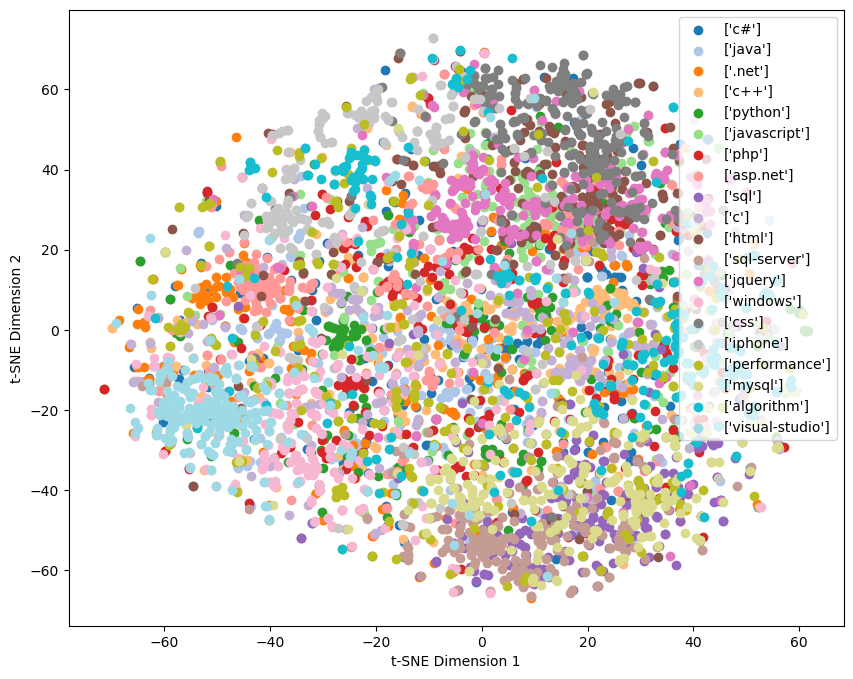

In [ ]:
plot_tSNE(X_train_tsne, y_train_labels, tags_list)

In [ ]:
# Save the best model with pickle
best_svc_model = multi_svc_cv.best_estimator_
with open("best_model_svc.pkl", "wb") as f:
    pickle.dump(best_svc_model, f)

In [ ]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize LinearSVC with OneVsRest
param_svc = {
    "estimator__C": [0.1, 1.0, 10.0],
    "estimator__penalty": ["l1", "l2"],
    "estimator__dual": [False],
    "estimator__loss": ["squared_hinge"],
    "estimator__max_iter": [1000, 2000, 5000]
}

multi_svc_cv = GridSearchCV(
    OneVsRestClassifier(LinearSVC(max_iter=1000)),
    param_grid=param_svc,
    n_jobs=-1,
    cv=2,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True,
    verbose=3
)
# Record the start time
start_time = time.time()

multi_svc_cv.fit(feat_train1, y_train_labels)
# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV Execution Time: {execution_time} seconds")

Fitting 2 folds for each of 18 candidates, totalling 36 fits
GridSearchCV Execution Time: 54.30985116958618 seconds


In [ ]:
best_svc_model = multi_svc_cv.best_estimator_
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_svc_model.predict(feat_test)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6971065791986121
Weighted Jaccard Coefficient: 0.5587073726524067
Accuracy: 0.7073578595317725
Weighted Recall: 0.7073578595317725
Weighted Precision: 0.7018927926463067


In [ ]:
calculate_empty_predicted_percentage(y_pred_labels, y_test_labels)

0.0

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
html		python
visual-studio		visual-studio
algorithm		algorithm
html		html
sql-server		sql-server
python		python
java		java
html		html
c		c++
javascript		javascript
performance		performance
algorithm		algorithm
php		php
iphone		iphone
sql-server		.net
asp.net		asp.net
php		php


In [ ]:
# Apply t-SNE to reduce the test set features to 2D using the same t-SNE model
X_test_tsne = tsne_model.fit_transform(feat_test)

TRUE VS PREDICTED TAGS

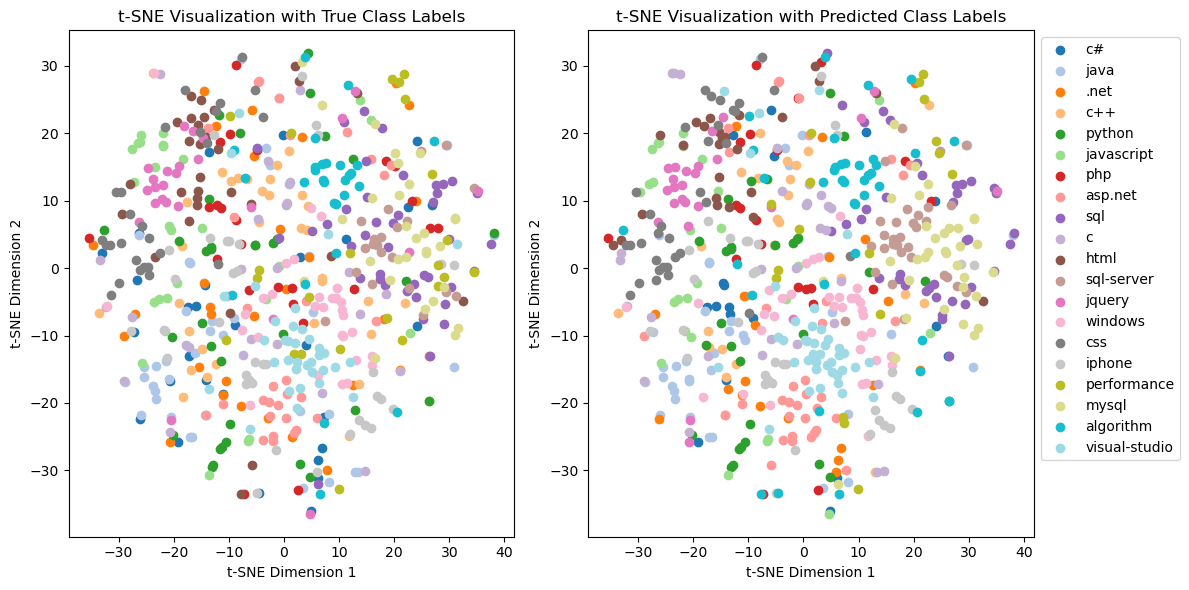

In [ ]:
plot_tSNE_double(X_test_tsne, y_test_labels, y_pred_labels, true_tags_list=tags_list, pred_tags_list=tags_list)

In [ ]:
model_name = "n-grammes with SVM"
metrics_scores = {
    "Weighted F1 Score": 0.6971065791986121,
    "Weighted Jaccard Coefficient": 0.5587073726524067,
    "Accuracy": 0.7073578595317725,
    "Weighted Recall": 0.7073578595317725,
    "Weighted Precision": 0.7018927926463067
}

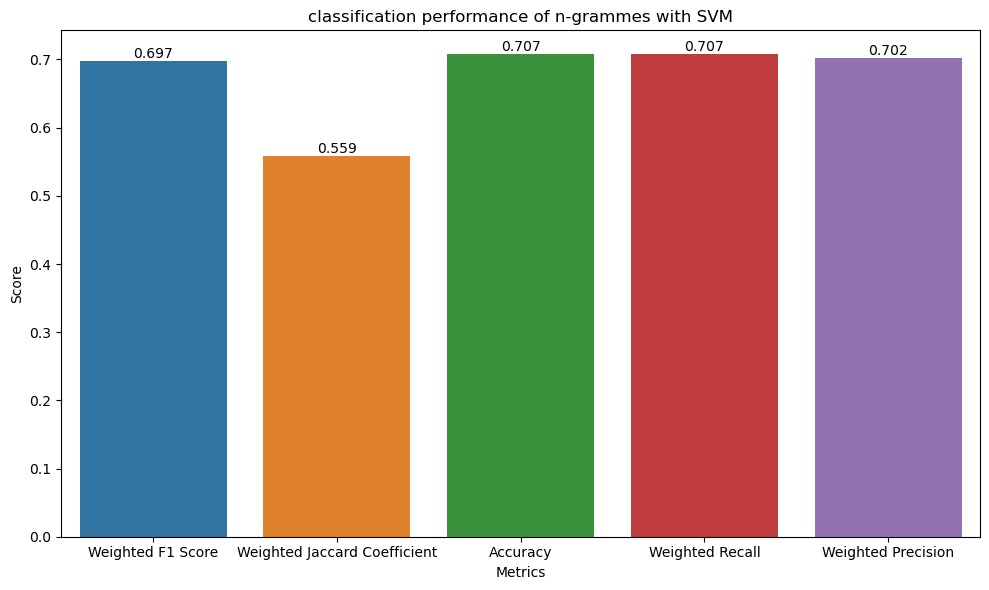

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

# Réduire les dimensions avec TruncatedSVD

C’est un moyen fréquemment utilisé pour réduire les dimensions. On choisit le modèle TruncatedSVD plutôt que l’ACP dont l’implémentation ne supporte pas les features sparses.

In [ ]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train)
feat_train_svd = pipe_svd.transform(X_train)
feat_train_svd.shape

(5382, 300)

In [ ]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train)
feat_train_svd = pipe_svd.transform(X_train)
feat_train_svd.shape

(5382, 300)

In [ ]:
feat_test_svd = pipe_svd.transform(X_test)

In [ ]:
from sklearn.svm import SVC
clf2 = SVC()

# Fit the SVM model on the training data
clf2.fit(feat_train_svd, y_train_labels)

SVC()

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = clf2.predict(feat_test_svd)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.5906840216719301
Weighted Jaccard Coefficient: 0.4408951479565628
Accuracy: 0.580267558528428
Weighted Recall: 0.580267558528428
Weighted Precision: 0.6386515807462976


# TF IDF WITH RANDOM FOREST

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
pipe2 = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe2.fit(X_train)
feat_train2 = pipe2.transform(X_train)
feat_train2.shape

(5382, 23104)

In [ ]:
import numpy as np
y_train_labels = np.argmax(y_train.values, axis=1)

In [ ]:
feat_test2 = pipe2.transform(X_test)
feat_test2.shape

(598, 23104)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


X_train_tfidf = feat_train2.toarray()  # Convert sparse matrix to a dense numpy array

# Apply t-SNE to reduce the features to 2D
tsne_model = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne_model.fit_transform(X_train_tfidf)
X_test_tfidf = feat_test2.toarray()
X_test_tsne = tsne_model.fit_transform(X_test_tfidf)

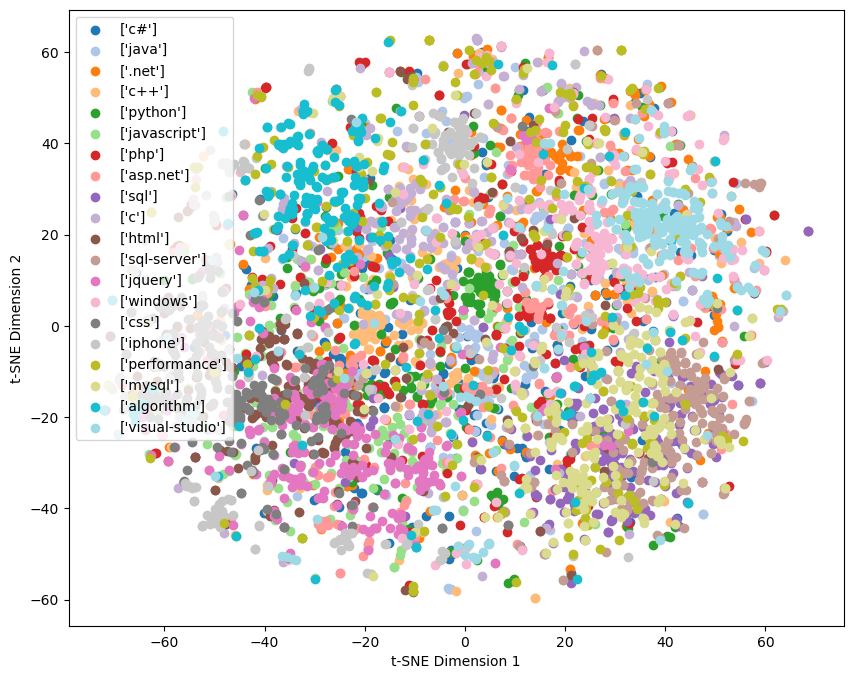

In [ ]:
plot_tSNE(X_train_tsne, y_train_labels, tags_list)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
import time

# Initialize RandomForest with OneVsRest
param_rfc = {
    "estimator__max_depth": [5, 25, 50],
    "estimator__min_samples_leaf": [1, 5, 10],
    "estimator__class_weight": ["balanced"]
}

multi_rfc_cv = GridSearchCV(
    OneVsRestClassifier(RandomForestClassifier()),
    param_grid=param_rfc,
    n_jobs=-1,
    cv=2,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True,
    verbose=3
)

# Record the start time
start_time = time.time()

multi_rfc_cv.fit(feat_train2, y_train_labels)

# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV Execution Time: {execution_time} seconds")


Fitting 2 folds for each of 9 candidates, totalling 18 fits
GridSearchCV Execution Time: 298.7993493080139 seconds


In [ ]:
# Save the best model with pickle
best_rfc_model = multi_rfc_cv.best_estimator_
with open("best_model_rfc.pkl", "wb") as f:
    pickle.dump(best_rfc_model, f)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_rfc_model.predict(feat_test2)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6462525034203823
Weighted Jaccard Coefficient: 0.509647988138202
Accuracy: 0.6555183946488294
Weighted Recall: 0.6555183946488294
Weighted Precision: 0.665718722174032


In [ ]:
calculate_empty_predicted_percentage(y_pred_labels, y_test_labels)

0.0

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(10):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
html		python
visual-studio		visual-studio
algorithm		algorithm
css		html
sql-server		sql-server
visual-studio		python
java		java


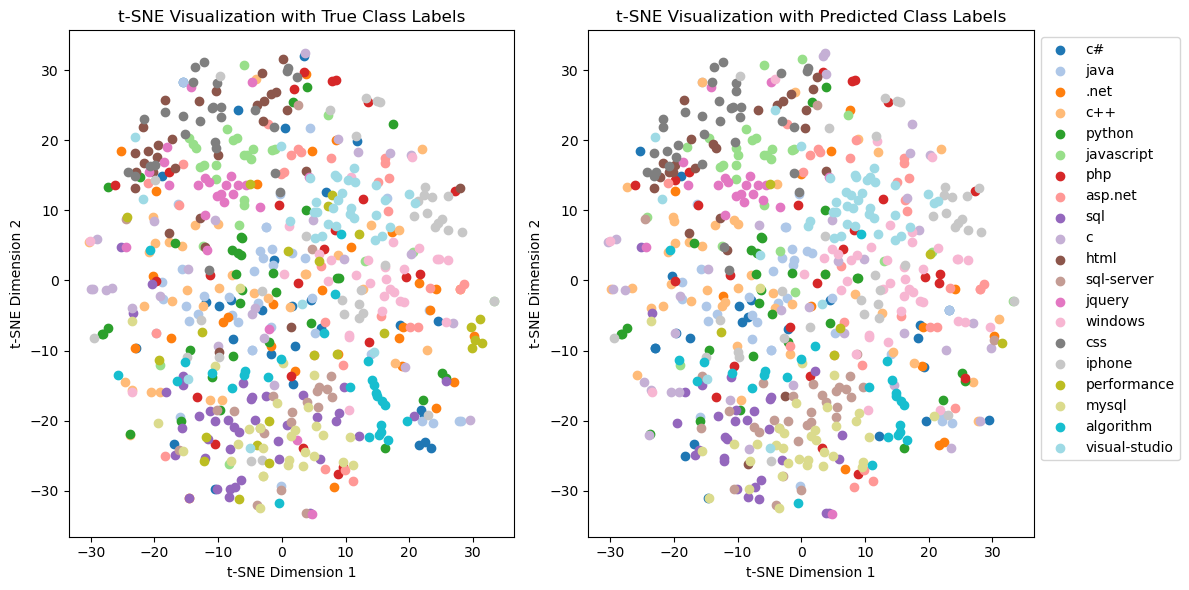

In [ ]:
plot_tSNE_double(X_test_tsne, y_test_labels, y_pred_labels, true_tags_list=tags_list, pred_tags_list=tags_list)

In [ ]:
model_name = "TF IDF WITH RANDOM FOREST"
metrics_scores = {
    "Weighted F1 Score": 0.6462525034203823,
    "Weighted Jaccard Coefficient": 0.509647988138202,
    "Accuracy": 0.6555183946488294,
    "Weighted Recall": 0.6555183946488294,
    "Weighted Precision": 0.665718722174032
}


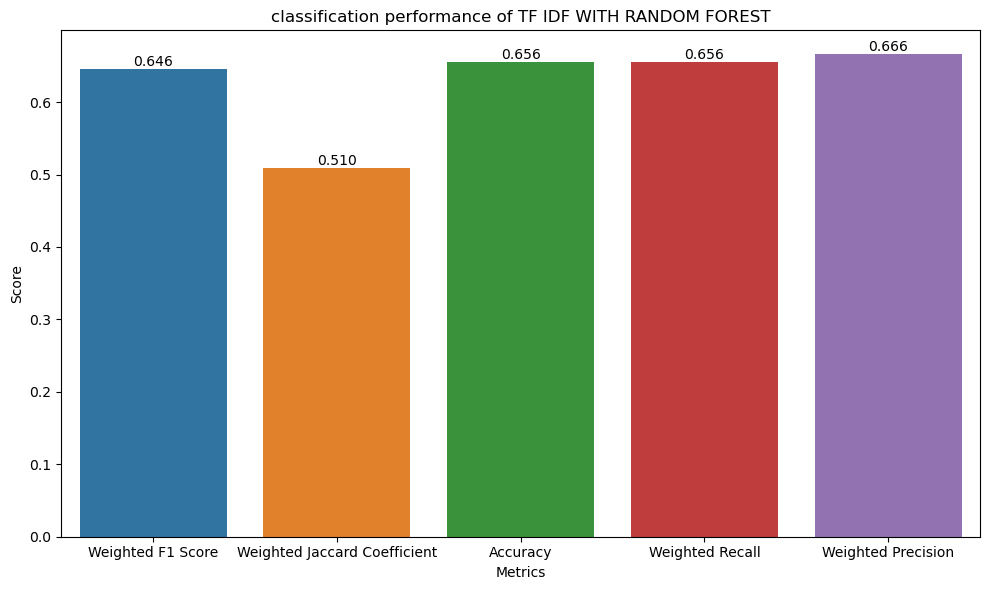

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

# USE WITH MLP

In [ ]:
import tensorflow_hub as hub
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

class UniversalSentenceEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_url):
        self.model_url = model_url
        self.model = hub.load(self.model_url)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        embeddings = self.model(X)
        return np.array(embeddings)

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Create the pipeline with the custom transformer
pipeUSE = Pipeline([
    ('use', UniversalSentenceEncoderTransformer(model_url=use_model_url))
])

# Fit and transform the data
feat_trainUSE = pipeUSE.fit_transform(X_train)

print(feat_trainUSE.shape)


(5382, 512)


In [ ]:
import tensorflow_hub as hub
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

class UniversalSentenceEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_url):
        self.model_url = model_url
        self.model = hub.load(self.model_url)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        embeddings = self.model(X)
        return np.array(embeddings)

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Create the pipeline with the custom transformer
pipeUSE = Pipeline([
    ('use', UniversalSentenceEncoderTransformer(model_url=use_model_url))
])

# Fit and transform the data
feat_trainUSE = pipeUSE.fit_transform(X_train)

print(feat_trainUSE.shape)

(5382, 512)


In [ ]:
feat_testUSE = pipeUSE.transform(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the features to 2D
tsne_model = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne_model.fit_transform(feat_trainUSE )

In [ ]:
# Apply t-SNE to reduce the test set features to 2D using the same t-SNE model
X_test_tsne = tsne_model.fit_transform(feat_testUSE)

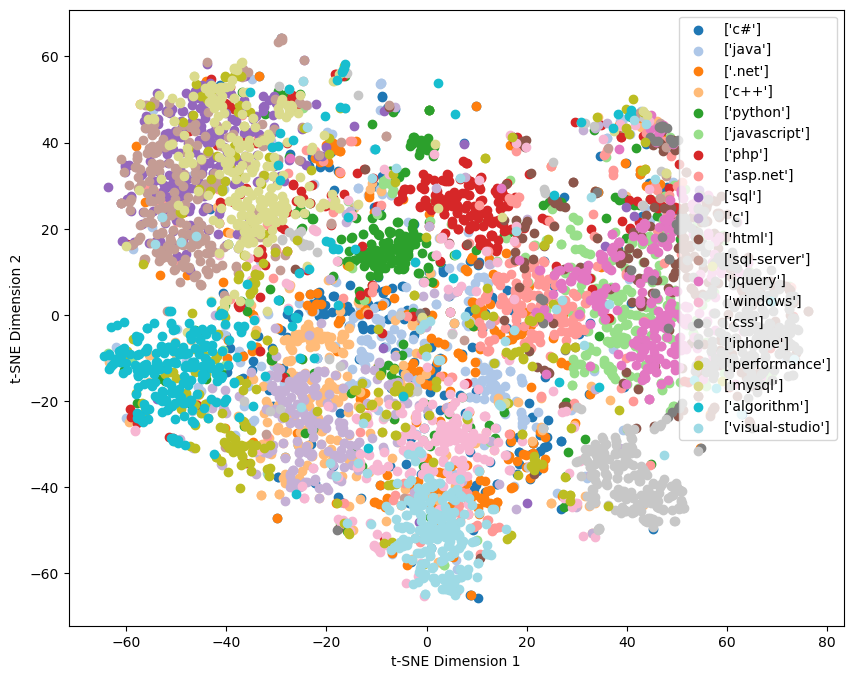

In [ ]:
plot_tSNE(X_train_tsne, y_train_labels, tags_list)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Define and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=200, random_state=42)
mlp_classifier.fit(feat_trainUSE, y_train_labels)

MLPClassifier(hidden_layer_sizes=(256, 128), random_state=42)

In [ ]:
# Save the best model with pickle
with open("mlp_classifier.pkl", "wb") as f:
    pickle.dump(mlp_classifier, f)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score

y_pred_labels = mlp_classifier.predict(feat_testUSE)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.6348466431776636
Weighted Jaccard Coefficient: 0.4896868429350547
Accuracy: 0.6387959866220736
Weighted Recall: 0.6387959866220736
Weighted Precision: 0.6363047448741698


In [ ]:
y_pred_labels = mlp_classifier.predict(feat_testUSE)

In [ ]:
calculate_empty_predicted_percentage(y_pred_labels, y_test_labels)

0.0

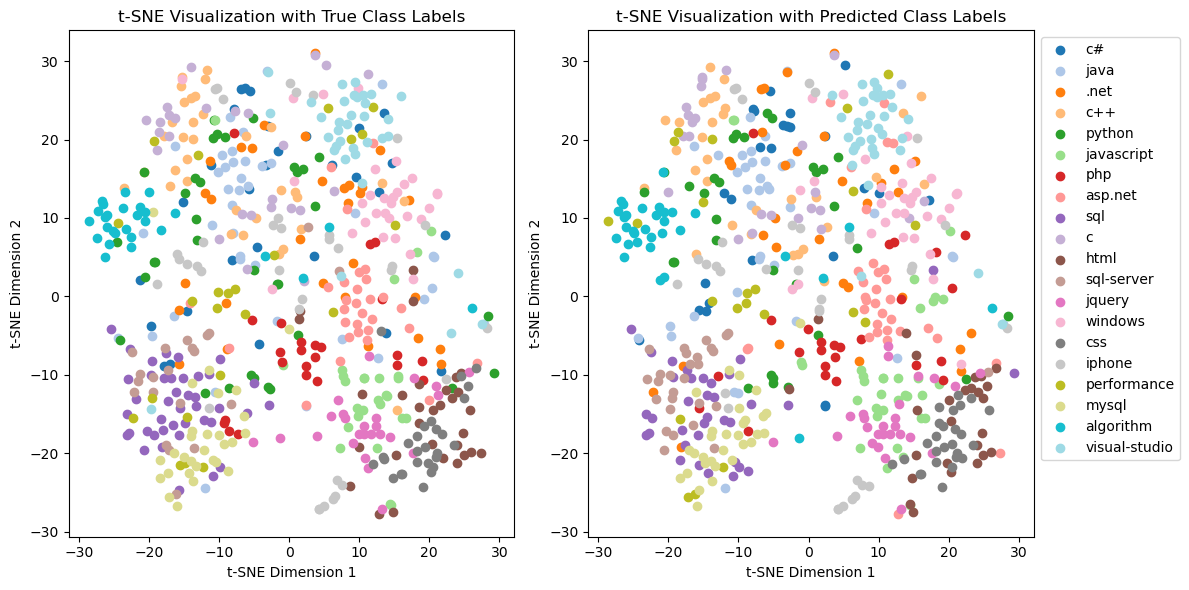

In [ ]:
plot_tSNE_double(X_test_tsne, y_test_labels, y_pred_labels, true_tags_list=tags_list, pred_tags_list=tags_list)

In [ ]:
model_name = "USE WITH MLP"

metrics_scores = {
    "Weighted F1 Score": 0.6348466431776636,
    "Weighted Jaccard Coefficient": 0.4896868429350547,
    "Accuracy": 0.6387959866220736,
    "Weighted Recall": 0.6387959866220736,
    "Weighted Precision": 0.6363047448741698
}

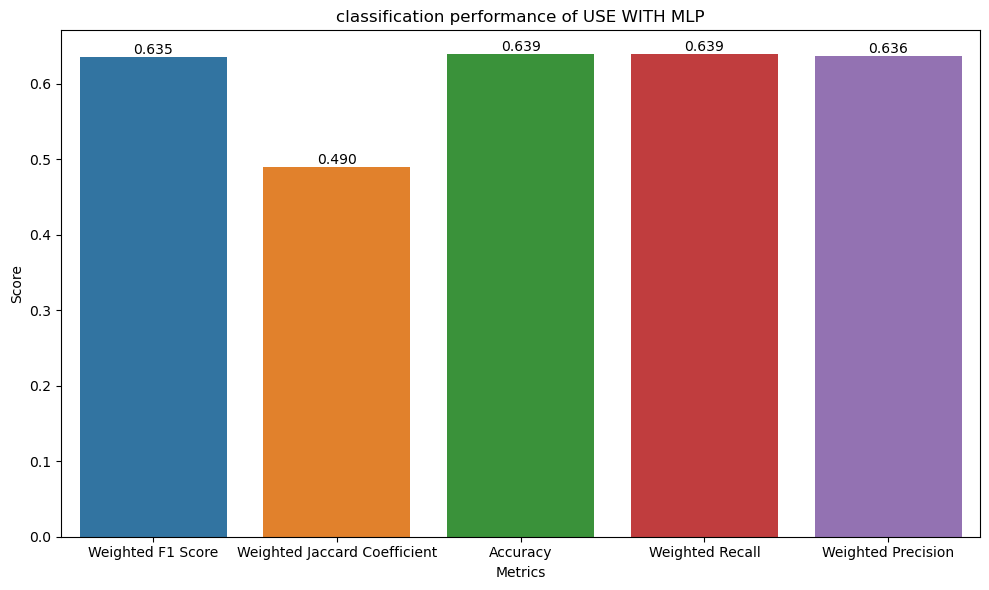

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

# BERT WITH CNN

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Example data and labels (replace this with your actual data)
texts = balanced_data['text_1'].tolist()  # Convert to a list of strings
labels = one_hot_encoded_subset

# Tokenize the text data and convert to input IDs and attention masks
def tokenize_texts(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf", max_length=128)
    return inputs

input_ids = tokenize_texts(texts)['input_ids']
attention_masks = tokenize_texts(texts)['attention_mask']

# Convert TensorFlow tensors to NumPy arrays
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Get BERT embeddings for the input text
bert_embeddings = bert_model.predict([input_ids, attention_masks])[0]

# Convert labels to NumPy arrays
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, labels, test_size=0.1, random_state=42)

# Define and train the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, 5, activation='relu', input_shape=(128, 768)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')  # Adjust the output dimension based on your classification task
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the CNN model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Test accuracy:", accuracy)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

187/187 [==============================] - 909s 5s/step
Epoch 1/5
152/152 [==============================] - 9s 51ms/step - loss: 2.0941 - accuracy: 0.3750 - val_loss: 1.3021 - val_accuracy: 0.6030
Epoch 2/5
152/152 [==============================] - 7s 48ms/step - loss: 1.1685 - accuracy: 0.6349 - val_loss: 1.0742 - val_accuracy: 0.6494
Epoch 3/5
152/152 [==============================] - 7s 48ms/step - loss: 0.8147 - accuracy: 0.7316 - val_loss: 1.1532 - val_accuracy: 0.6289
Epoch 4/5
152/152 [==============================] - 7s 48ms/step - loss: 0.5535 - accuracy: 0.8133 - val_loss: 1.2342 - val_accuracy: 0.6252
Epoch 5/5
19/19 [==============================] - 0s 17ms/step
Test accuracy: 0.6755852842809364


In [ ]:
# Save the model
model.save("BERTCNN.h5")

# Save the train and test data using numpy.save
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

C:\Users\Aioub\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score, precision_score


y_test_labels = y_test.argmax(axis=1)
y_pred_labels = y_pred.argmax(axis=1)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)



Weighted F1 Score: 0.6730709062326055
Weighted Jaccard Coefficient: 0.5301519343900816
Accuracy: 0.6755852842809364
Weighted Recall: 0.6755852842809364
Weighted Precision: 0.687138130705699


In [ ]:
calculate_empty_predicted_percentage(y_pred_labels, y_test_labels)

0.0

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
php		python
visual-studio		visual-studio
algorithm		algorithm
css		html
sql-server		sql-server
python		python
c#		java
windows		html
.net		c++
javascript		javascript
performance		performance
algorithm		algorithm
php		php
iphone		iphone
sql-server		.net
asp.net		asp.net
php		php


In [ ]:
model_name = "BERT WITH CNN"

metrics_scores = {
    "Weighted F1 Score": 0.6730709062326055,
    "Weighted Jaccard Coefficient": 0.5301519343900816,
    "Accuracy": 0.6755852842809364,
    "Weighted Recall": 0.6755852842809364,
    "Weighted Precision": 0.687138130705699
}

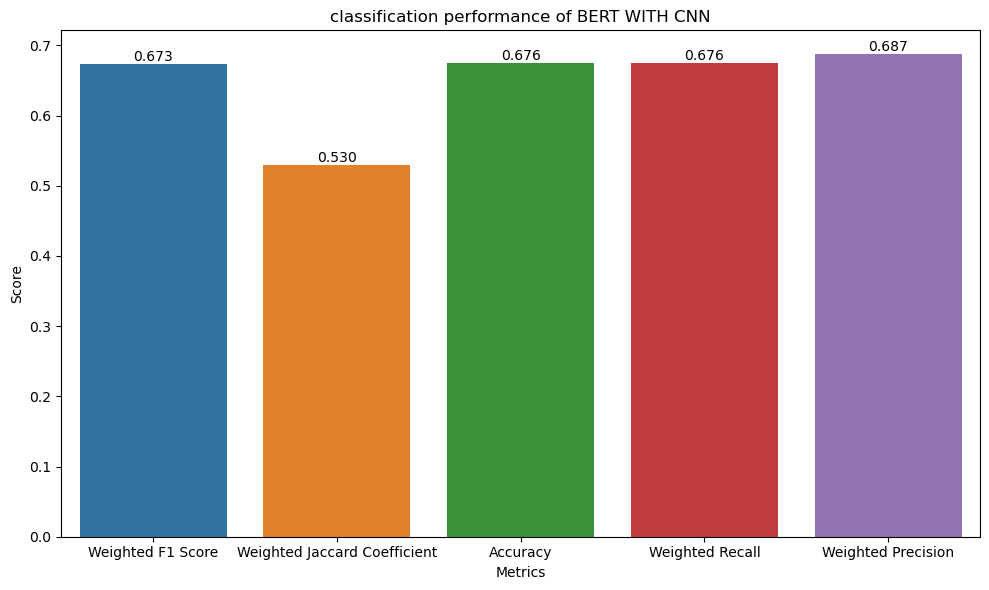

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

# Word2vec WITH  LR

In [ ]:
pip install gensim


In [ ]:
!python -m spacy download en_core_web_md

     --------------------------------------- 42.8/42.8 MB 11.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import numpy as np
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

def spacy_sum_vectors(phrase, nlp):
    dec = nlp(phrase)
    return sum(w.vector for w in dec)

def spacy_word2vec_features(X, nlp):
    feats = np.vstack([spacy_sum_vectors(p, nlp) for p in X])
    return feats

# Assuming `X_train` and `X_test` are lists of sentences/phrases
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text'].values, one_hot_encoded_subset, test_size=0.1, random_state=42)

continue_wv = True  # You can set this to False if you want to skip using spaCy for word vectors

if continue_wv:
    try:
        wv_train_feat2 = spacy_word2vec_features(X_train, nlp)
        print(wv_train_feat2.shape)
    except ValueError as e:
        print(e)
        continue_wv = False

In [ ]:
import numpy as np
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

def spacy_sum_vectors(phrase, nlp):
    dec = nlp(phrase)
    return sum(w.vector for w in dec)

def spacy_word2vec_features(X, nlp):
    feats = np.vstack([spacy_sum_vectors(p, nlp) for p in X])
    return feats

# Assuming `X_train` and `X_test` are lists of sentences/phrases
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text'].values, one_hot_encoded_subset, test_size=0.1, random_state=42)

continue_wv = True  # You can set this to False if you want to skip using spaCy for word vectors

if continue_wv:
    try:
        wv_train_feat2 = spacy_word2vec_features(X_train, nlp)
        print(wv_train_feat2.shape)
    except ValueError as e:
        print(e)
        continue_wv = False

(5382, 300)


In [ ]:
from sklearn.linear_model import LogisticRegression
if continue_wv:
    # Convert y_train to 1D array of integers
    y_train_labels = np.argmax(y_train.values, axis=1)

    clfwv2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    clfwv2.fit(wv_train_feat2, y_train_labels)

if continue_wv:
    wv_test_feat2 = spacy_word2vec_features(X_test, nlp)
    y_test_labels = np.argmax(y_test.values, axis=1)
    wv_test_feat2.shape

C:\Users\Aioub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
wv_test_feat2.shape

(598, 300)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = clfwv2.predict(wv_test_feat2)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.44299614376505936
Weighted Jaccard Coefficient: 0.2980121620255949
Accuracy: 0.4431438127090301
Weighted Recall: 0.4431438127090301
Weighted Precision: 0.45025856454697144


In [ ]:
import joblib
from google.colab import files

# Save the trained model to the Colab file system
filename = 'clfwv2_model.pkl'
joblib.dump(clfwv2, filename)

['clfwv2_model.pkl']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the features to 2D
tsne_model = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne_model.fit_transform(wv_train_feat2)

In [ ]:
X_test_tsne = tsne_model.fit_transform(wv_test_feat2)

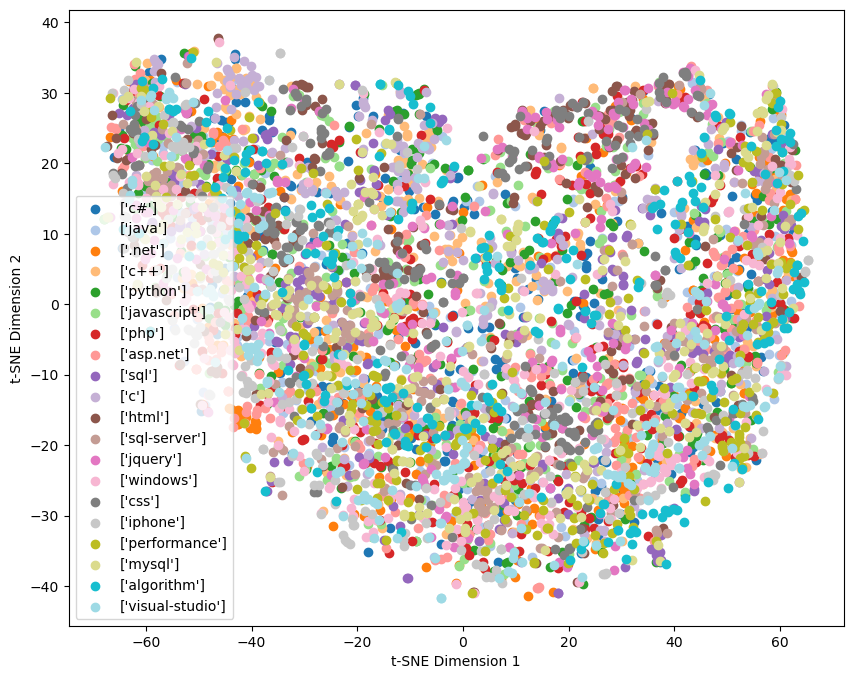

In [ ]:
plot_tSNE(X_train_tsne, y_train_labels, tags_list)

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
# Convert y_train to 1D array of integers
y_train_labels = np.argmax(y_train.values, axis=1)
# Initialize Logistic Regression with OneVsRest
param_logit = {
    "estimator__C": [10, 1.0, 0.1],
    "estimator__penalty": ["l1", "l2"],
    "estimator__dual": [False],
    "estimator__solver": ["liblinear"]
}

multi_logit_cv = GridSearchCV(
    OneVsRestClassifier(LogisticRegression()),
    param_grid=param_logit,
    n_jobs=-1,
    cv=5,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True
)
multi_logit_cv.fit(wv_train_feat2,y_train_labels)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_logit_model.predict(wv_test_feat2)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.47756255495657535
Weighted Jaccard Coefficient: 0.3286352280945145
Accuracy: 0.48327759197324416
Weighted Recall: 0.48327759197324416
Weighted Precision: 0.4798043772478381


In [ ]:
calculate_empty_predicted_percentage(y_pred_labels, y_test_labels)

0.0

In [ ]:
calculate_non_predicted_percentage(y_test_labels, y_pred_labels)

89.63210702341136

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
php		python
sql		visual-studio
c		algorithm
html		html
sql		sql-server
python		python
java		java
html		html
java		c++
jquery		javascript
sql-server		performance
algorithm		algorithm
performance		php
css		iphone
.net		.net
asp.net		asp.net
asp.net		php


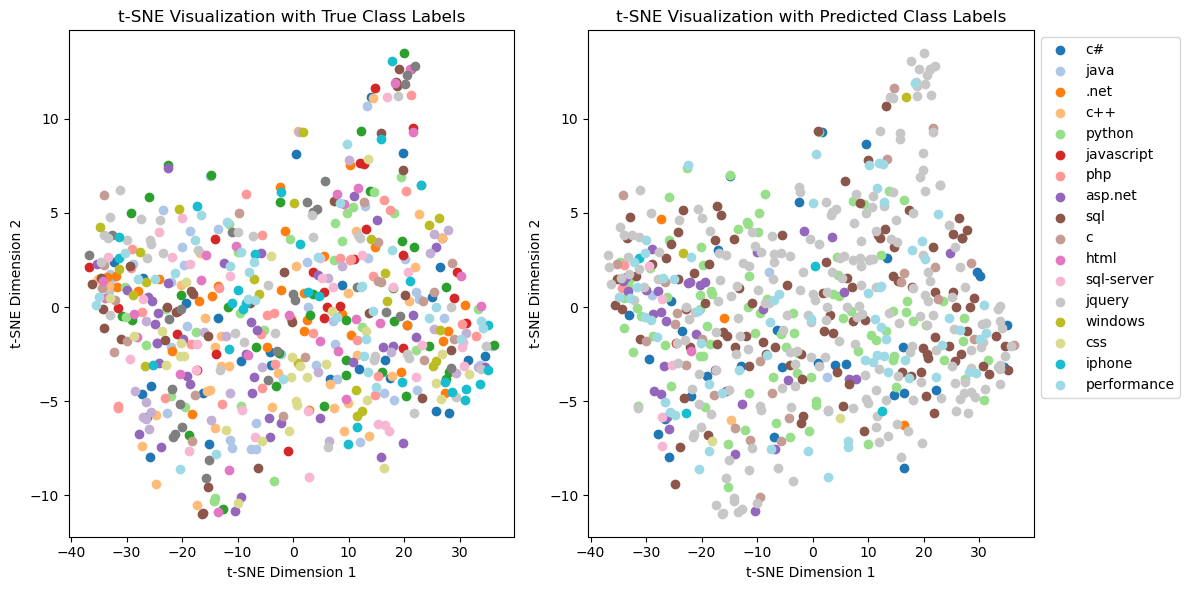

In [ ]:
plot_tSNE_double(X_test_tsne, y_test_labels, y_pred_labels, true_tags_list=tags_list, pred_tags_list=tags_list)

In [ ]:
model_name = "Word2vec With Logistic Regression"

metrics_scores = {
    "Weighted F1 Score": 0.47756255495657535,
    "Weighted Jaccard Coefficient": 0.3286352280945145,
    "Accuracy": 0.48327759197324416,
    "Weighted Recall": 0.48327759197324416,
    "Weighted Precision": 0.4798043772478381
}

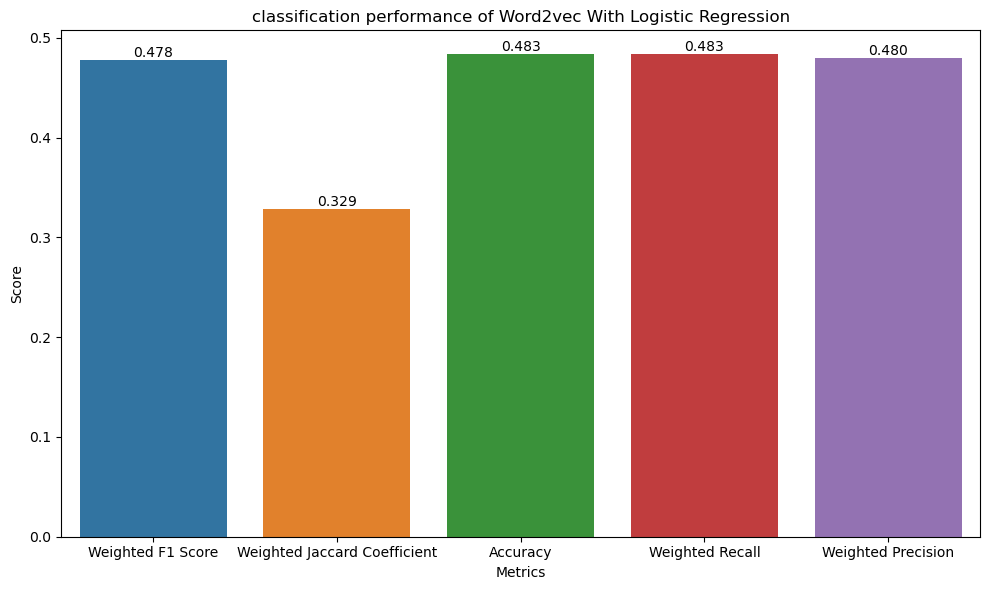

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

# LSTM WITH  KERAS

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from sklearn.model_selection import train_test_split
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

VOCAB_SIZE = 1000
batch_size = 32
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',  # Ensure output is integer-encoded
    output_sequence_length=31,  # Set the maximum sequence length
    pad_to_max_tokens=False,  # Allow variable sequence length
    input_shape=(1,)  # Specify the input shape as 1D tensor
)

# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text_1'], one_hot_encoded_subset, test_size=0.1, random_state=42)

encoder.adapt(X_train)
train_encodings = encoder(X_train).numpy()
test_encodings = encoder(X_test).numpy()

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings, y_train)).shuffle(len(train_encodings)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_encodings, y_test)).batch(batch_size)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings, y_train)).shuffle(len(train_encodings)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_encodings, y_test)).batch(batch_size)

# Define the model with the correct input shape and 20 output classes
input_layer = Input(shape=(31,), dtype=tf.int32)
embedding_layer = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True)(input_layer)
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(embedding_layer)
dense_layer = tf.keras.layers.Dense(64, activation='relu')(lstm_layer)
output_layer = tf.keras.layers.Dense(20, activation='softmax')(dense_layer)  # Use softmax activation for multi-class classification

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, validation_steps=len(test_dataset))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 31)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 31, 64)            64000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
Total params: 139604 (545.33 KB)
Trainable params: 139604 (545.33 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [ ]:
# Make predictions on the test dataset
y_pred = model.predict(test_dataset)

19/19 [==============================] - 3s 9ms/step


In [ ]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary
y_test_binary = y_test.astype(int)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score

# Calculate weighted F1 score, weighted Jaccard coefficient, weighted precision, and weighted recall using binary predictions
f1_weighted = f1_score(y_test_binary, y_pred_binary, average='weighted')
jaccard_weighted = jaccard_score(y_test_binary, y_pred_binary, average='weighted')
precision_weighted = precision_score(y_test_binary, y_pred_binary, average='weighted')
recall_weighted = recall_score(y_test_binary, y_pred_binary, average='weighted')

print('Weighted F1 Score:', f1_weighted)
print('Weighted Jaccard Coefficient:', jaccard_weighted)
print('Weighted Precision:', precision_weighted)
print('Weighted Recall:', recall_weighted)


Weighted F1 Score: 0.4264488671563096
Weighted Jaccard Coefficient: 0.29384894319078614
Weighted Precision: 0.5994332695523421
Weighted Recall: 0.36622073578595316


In [ ]:
metrics_scores = {
    "Weighted F1 Score": 0.4078190860185285,
    "Weighted Jaccard Coefficient": 0.2733131289252182,
    "Accuracy": 0.49665552377700806,
    "Weighted Precision": 0.5679025996720752,
    "Weighted Recall": 0.3511705685618729
}
model_name="LSTM with TextVectorization "

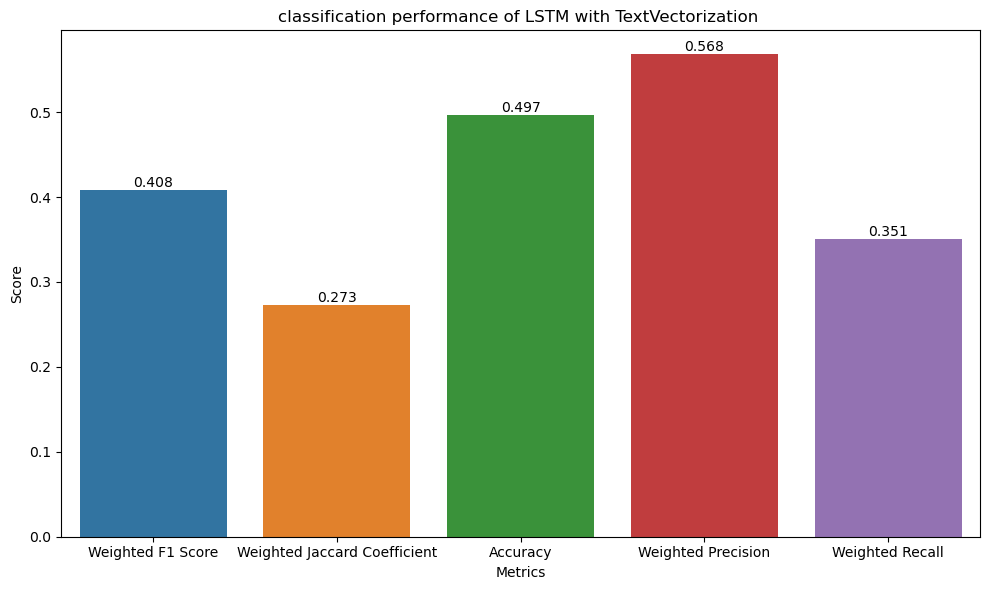

In [ ]:
plot_metrics_scores(model_name, metrics_scores)

#  Performance

In [ ]:
import pandas as pd

# Model Name and Metrics Scores for LSTM model
model_name = "LSTM with TextVectorization"
metrics_scores = {
    "Accuracy": 0.49665552377700806,
    "Weighted F1 Score": 0.4078190860185285,
    "Weighted Jaccard Coefficient": 0.2733131289252182,
    "Weighted Precision": 0.5679025996720752,
    "Weighted Recall": 0.3511705685618729,

}

# Create a dictionary to store the model performances
model_performances = {
    "USE WITH MLP": {
        "Weighted F1 Score": 0.6348466431776636,
        "Weighted Jaccard Coefficient": 0.4896868429350547,
        "Accuracy": 0.6387959866220736,
        "Weighted Recall": 0.6387959866220736,
        "Weighted Precision": 0.6363047448741698,
    },
    "Word2vec With LogisticRegression": {
        "Weighted F1 Score": 0.47756255495657535,
        "Weighted Jaccard Coefficient": 0.3286352280945145,
        "Accuracy": 0.48327759197324416,
        "Weighted Recall": 0.48327759197324416,
        "Weighted Precision": 0.4798043772478381,
    },
    "TF IDF WITH RANDOM FOREST": {
        "Weighted F1 Score": 0.6462525034203823,
        "Weighted Jaccard Coefficient": 0.509647988138202,
        "Accuracy": 0.6555183946488294,
        "Weighted Recall": 0.6555183946488294,
        "Weighted Precision": 0.665718722174032,
    },
    "n-grammes with SVM": {
        "Weighted F1 Score": 0.6971065791986121,
        "Weighted Jaccard Coefficient": 0.5587073726524067,
        "Accuracy": 0.7073578595317725,
        "Weighted Recall": 0.7073578595317725,
        "Weighted Precision": 0.7018927926463067,
    }
}

# Add LSTM model's metrics and percentage of non-tagged questions to the dictionary
model_performances[model_name] = {
    "Weighted F1 Score": metrics_scores["Weighted F1 Score"],
    "Weighted Jaccard Coefficient": metrics_scores["Weighted Jaccard Coefficient"],
    "Accuracy": metrics_scores["Accuracy"],
    "Weighted Recall": metrics_scores["Weighted Recall"],
    "Weighted Precision": metrics_scores["Weighted Precision"],
}

# Additional model information for BERT WITH CNN
model_name = "BERT WITH CNN"

metrics_scores = {
    "Weighted F1 Score": 0.6730709062326055,
    "Weighted Jaccard Coefficient": 0.5301519343900816,
    "Accuracy": 0.6755852842809364,
    "Weighted Recall": 0.6755852842809364,
    "Weighted Precision": 0.687138130705699
}

# Add BERT WITH CNN model's metrics and percentage of non-tagged questions to the dictionary
model_performances[model_name] = {
    "Weighted F1 Score": metrics_scores["Weighted F1 Score"],
    "Weighted Jaccard Coefficient": metrics_scores["Weighted Jaccard Coefficient"],
    "Accuracy": metrics_scores["Accuracy"],
    "Weighted Recall": metrics_scores["Weighted Recall"],
    "Weighted Precision": metrics_scores["Weighted Precision"],
}

# Update the dataframe
df_performances = pd.DataFrame.from_dict(model_performances, orient='index')

In [ ]:
# Assuming you have the execution times in a dictionary named `execution_times`
execution_times = {
    "LSTM with TextVectorization": 25.6,
    "USE WITH MLP": 39,
    "Word2vec With LogisticRegression": 416,
    "TF IDF WITH RANDOM FOREST": 60.5,
    "n-grammes with SVM": 54,
    "BERT WITH CNN": 220,
}

# Add the "Temps d'exécution" column to the DataFrame
df_performances["Training Time"] = df_performances.index.map(execution_times)




In [ ]:
df_performances

,Weighted F1 Score,Weighted Jaccard Coefficient,Accuracy,Weighted Recall,Weighted Precision,Training Time
USE WITH MLP,0.634847,0.489687,0.638796,0.638796,0.636305,39.0
Word2vec With LogisticRegression,0.477563,0.328635,0.483278,0.483278,0.479804,416.0
TF IDF WITH RANDOM FOREST,0.646253,0.509648,0.655518,0.655518,0.665719,60.5
n-grammes with SVM,0.697107,0.558707,0.707358,0.707358,0.701893,54.0
LSTM with TextVectorization,0.407819,0.273313,0.496656,0.351171,0.567903,25.6
BERT WITH CNN,0.673071,0.530152,0.675585,0.675585,0.687138,220.0


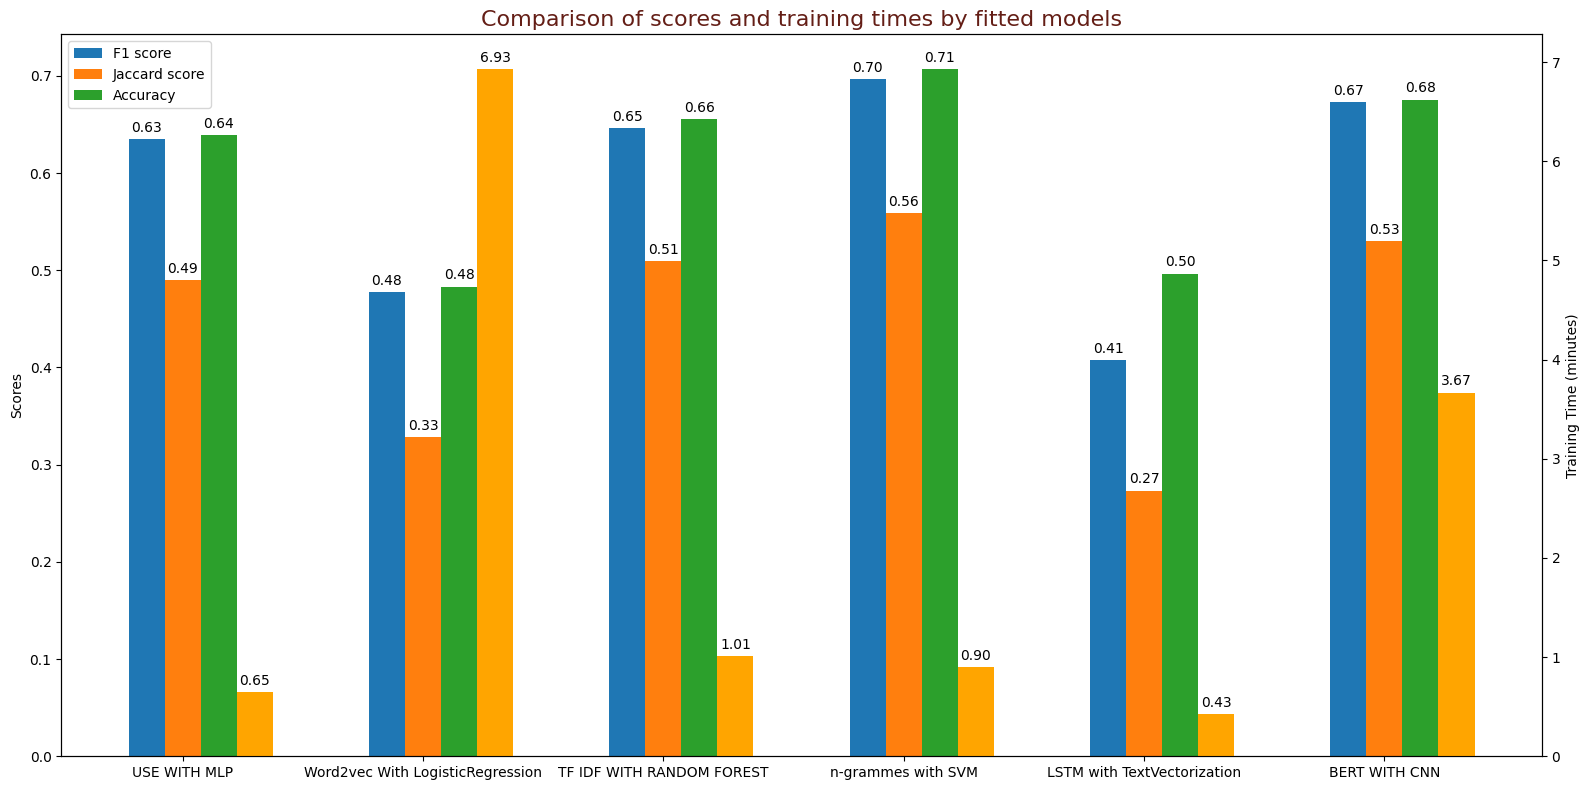

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the data for plotting
x = np.arange(len(df_performances.index))
width = 0.15  # Adjust the width to increase/decrease space between bars
f1_scores = df_performances['Weighted F1 Score']
jacc_scores = df_performances['Weighted Jaccard Coefficient']
acc_scores = df_performances['Accuracy']
training_times = df_performances['Training Time'] / 60  # Scale training times to minutes

# Create the figure and axes with an increased width for the entire plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the bars for F1 score, Jaccard score, and Accuracy
ax.bar(x - width, f1_scores, width, label="F1 score")
ax.bar(x, jacc_scores, width, label="Jaccard score")
ax.bar(x + width, acc_scores, width, label="Accuracy")

# Set the y-axis label and title for the plot
ax.set_ylabel('Scores')
ax.set_title('Comparison of scores and training times by fitted models',
             color="#641E16",
             fontdict={'fontsize': 16})

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(df_performances.index)

# Set the legend
ax.legend()

# Add value labels to the bars for F1 score, Jaccard score, and Accuracy
def autolabel(rects):
    """Attach a text label above each bar for F1 score, Jaccard score, and Accuracy."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax.containers[0])
autolabel(ax.containers[1])
autolabel(ax.containers[2])

# Create a secondary y-axis (ax2) for training times
ax2 = ax.twinx()
ax2.bar(x + 2 * width, training_times, width, label="Training Time (minutes)", color="orange")

# Set the y-axis label for the secondary y-axis
ax2.set_ylabel('Training Time (minutes)')

# Add value labels to the bars for Training Time (minutes)
def autolabel_training_time(rects):
    """Attach a text label above each bar for Training Time (minutes)."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom')

autolabel_training_time(ax2.containers[0])

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


# LDA MODEL

l'approche LDA pour extraire des sujets à partir d'un ensemble de textes prétraités. Il explore différents nombres de sujets et évalue la cohérence des sujets extraits. L'objectif est de déterminer le nombre optimal de sujets qui donne les meilleurs résultats de cohérence pour la classification des textes par sujets.

Fitting LDA for num_topics = 2
Fitting LDA for num_topics = 3
Fitting LDA for num_topics = 4
Fitting LDA for num_topics = 5
Fitting LDA for num_topics = 6
Fitting LDA for num_topics = 7
Fitting LDA for num_topics = 8
Fitting LDA for num_topics = 9
Fitting LDA for num_topics = 10
Fitting LDA for num_topics = 11
Fitting LDA for num_topics = 12


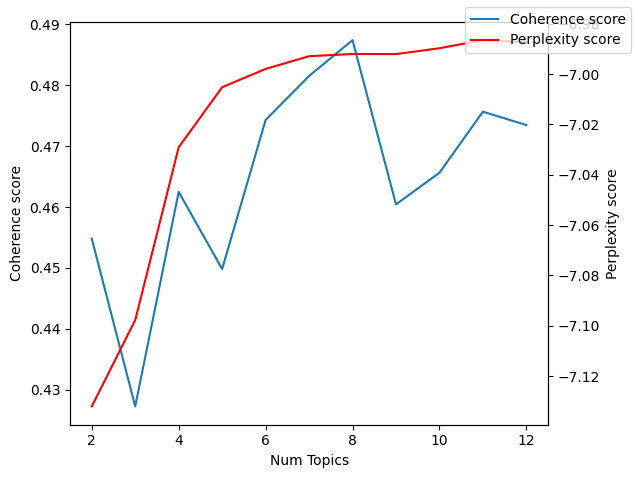

Num Topics = 2  has Coherence Value of 0.4548 and Perplexity Value of -7.1321
Num Topics = 3  has Coherence Value of 0.4272 and Perplexity Value of -7.0978
Num Topics = 4  has Coherence Value of 0.4625 and Perplexity Value of -7.0291
Num Topics = 5  has Coherence Value of 0.4498 and Perplexity Value of -7.0053
Num Topics = 6  has Coherence Value of 0.4743 and Perplexity Value of -6.998
Num Topics = 7  has Coherence Value of 0.4815 and Perplexity Value of -6.9929
Num Topics = 8  has Coherence Value of 0.4874 and Perplexity Value of -6.9921
Num Topics = 9  has Coherence Value of 0.4604 and Perplexity Value of -6.9921
Num Topics = 10  has Coherence Value of 0.4656 and Perplexity Value of -6.9898
Num Topics = 11  has Coherence Value of 0.4756 and Perplexity Value of -6.9866
Num Topics = 12  has Coherence Value of 0.4734 and Perplexity Value of -6.9874


In [ ]:
import logging
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaMulticore
from gensim.utils import simple_preprocess

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore", category=DeprecationWarning)


def create_dictionary(texts):
    """
    Create a dictionary (bag of words) from the input texts.

    Args:
        texts: List of input texts.

    Returns:
        id2word: Gensim dictionary.
    """
    id2word = corpora.Dictionary(texts)
    id2word.filter_extremes(no_below=4, no_above=0.6, keep_n=None)
    return id2word


def create_corpus(texts, dictionary):
    """
    Create a corpus using the given texts and dictionary.

    Args:
        texts: List of input texts.
        dictionary: Gensim dictionary.

    Returns:
        corpus: Gensim corpus.
    """
    corpus = [dictionary.doc2bow(text) for text in texts]
    return corpus


def compute_coherence_perplexity_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence and perplexity scores for various number of topics.

    Args:
        dictionary: Gensim dictionary.
        corpus: Gensim corpus.
        texts: List of input texts.
        limit: Max number of topics.
        start: Starting number of topics (default: 2).
        step: Step size for number of topics (default: 1).

    Returns:
        model_list: List of LDA topic models.
        coherence_values: Coherence values corresponding to the LDA model with respective number of topics.
        perplexity_values: Perplexity values corresponding to the LDA model with respective number of topics.
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("Fitting LDA for num_topics =", num_topics)
        lda_model = LdaMulticore(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=8,
            passes=10,
            workers=4
        )
        model_list.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        perplexity_values.append(lda_model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values


def plot_coherence_perplexity_values(start, limit, step, coherence_values, perplexity_values):
    """
    Plot the coherence and perplexity values.

    Args:
        start: Starting number of topics.
        limit: Max number of topics.
        step: Step size for number of topics.
        coherence_values: Coherence values corresponding to the LDA model with respective number of topics.
        perplexity_values: Perplexity values corresponding to the LDA model with respective number of topics.

    Returns:
        None
    """
    x = range(start, limit, step)
    fig, ax1 = plt.subplots()
    ax1.plot(x, coherence_values, label="Coherence score")
    ax1.set_xlabel("Num Topics")
    ax1.set_ylabel("Coherence score")
    ax2 = ax1.twinx()
    ax2.plot(x, perplexity_values, color='red', label="Perplexity score")
    ax2.set_ylabel("Perplexity score")
    fig.tight_layout()
    fig.legend(loc='upper right')
    plt.show()


def print_coherence_perplexity_scores(start, limit, step, coherence_values, perplexity_values):
    """
    Print the coherence and perplexity scores.

    Args:
        start: Starting number of topics.
        limit: Max number of topics.
        step: Step size for number of topics.
        coherence_values: Coherence values corresponding to the LDA model with respective number of topics.
        perplexity_values: Perplexity values corresponding to the LDA model with respective number of topics.

    Returns:
        None
    """
    for num_topics, cv, perplexity in zip(range(start, limit, step), coherence_values, perplexity_values):
        print("Num Topics =", num_topics, " has Coherence Value of", round(cv, 4), "and Perplexity Value of",
              round(perplexity, 4))


# Define X1 as a list of lists
X1 = [text.split() for text in subset['text_1'].copy()]

# Create dictionary
id2word = create_dictionary(X1)

# Create Corpus
corpus = create_corpus(X1, id2word)

# Compute coherence and perplexity values
model_list, coherence_values, perplexity_values = compute_coherence_perplexity_values(
    dictionary=id2word,
    corpus=corpus,
    texts=X1,
    start=2,
    limit=13,
    step=1
)

# Plot coherence and perplexity values
plot_coherence_perplexity_values(start=2, limit=13, step=1, coherence_values=coherence_values,
                                 perplexity_values=perplexity_values)

# Print coherence and perplexity scores
print_coherence_perplexity_scores(start=2, limit=13, step=1, coherence_values=coherence_values,
                                  perplexity_values=perplexity_values)


In [ ]:
import numpy as np
import pandas as pd

def print_topic_keywords(lda_model, num_top_keywords=10):
    """
    Print the top keywords for each topic in the given LDA model.

    Args:
        lda_model: Trained LDA model.
        num_top_keywords: Number of top keywords to display for each topic (default: 10).

    Returns:
        None
    """
    topic_names = ["Topic" + str(i) for i in range(lda_model.num_topics)]
    topic_keywords = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=num_top_keywords, formatted=False)

    print("-" * 50)
    print("Top Keywords for Each Topic")
    print("-" * 50)
    for topic in topic_keywords:
        topic_id = topic[0]
        keywords = [word for word, _ in topic[1]]
        print(f"Topic {topic_id}:")
        print(", ".join(keywords))
        print()

optimal_num_topics = 8

lda_best = model_list[optimal_num_topics - 2]

print_topic_keywords(lda_best, num_top_keywords=10)

--------------------------------------------------
Top Keywords for Each Topic
--------------------------------------------------
Topic 0:
c, use, int, code, way, number, would, like, array, value

Topic 1:
table, use, sql, query, -PRON-, select, row, d, database, value

Topic 2:
class, public, object, method, use, c, new, return, void, string

Topic 3:
use, file, net, java, application, server, get, web, page, php

Topic 4:
lt, gt, test, text, string, list, return, name, class, value

Topic 5:
c, use, code, file, like, would, work, get, python, exception

Topic 6:
system, window, use, code, new, user, object, application, event, file

Topic 7:
gt, lt, div, quot, -PRON-, d, td, type, html, value



In [ ]:
import logging
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaMulticore
from gensim.utils import simple_preprocess

def create_dictionary(texts):
    """
    Create a dictionary (bag of words) from the input texts.

    Args:
        texts: List of input texts.

    Returns:
        id2word: Gensim dictionary.
    """
    id2word = corpora.Dictionary(texts)
    id2word.filter_extremes(no_below=4, no_above=0.6, keep_n=None)
    return id2word


def create_corpus(texts, dictionary):
    """
    Create a corpus using the given texts and dictionary.

    Args:
        texts: List of input texts.
        dictionary: Gensim dictionary.

    Returns:
        corpus: Gensim corpus.
    """
    corpus = [dictionary.doc2bow(text) for text in texts]
    return corpus
# Define X1 as a list of lists
X1 = [text.split() for text in subset['text_1'].copy()]

# Create dictionary
id2word = create_dictionary(X1)


# Create Corpus
corpus = create_corpus(X1, id2word)

In [ ]:
import gensim
num_topics = 8
# Best LDA visualization
# Construire le modèle LDA
lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=num_topics,
                                  random_state=8,
                                  per_word_topics=True,
                                  passes=10,
                                      iterations=200,
                                  workers=4)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
# Convert lda_model to pyLDAvis format
lda_display = gensimvis.prepare(lda_model, corpus, id2word)

# Visualize the topic relationships
pyLDAvis.display(lda_display)

# NMF MODEL

In [ ]:
from sklearn.decomposition import NMF

def train_nmf_model(data, num_topics):
    """
    Train an NMF (Non-Negative Matrix Factorization) model on the given data.

    Args:
        data: Input data matrix.
        num_topics: Number of topics to extract.

    Returns:
        Trained NMF model.
    """
    nmf_model = NMF(n_components=num_topics, random_state=1, init='nndsvd')
    nmf_model.fit(data)
    return nmf_model

def display_topics(model, feature_names, num_top_words):
    """
    Display the top keywords for each topic in the given NMF model.

    Args:
        model: Trained NMF model.
        feature_names: List of feature names (column names).
        num_top_words: Number of top keywords to display for each topic.

    Returns:
        None
    """
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

# Assuming `tfidf1_data` is the TF-IDF data used for NMF
num_topics = 8
nmf_model = train_nmf_model(tfidf1_data.values, num_topics)

# Assuming `k` is the list of column names in `tfidf1_data`
no_top_words = 10
display_topics(nmf_model, tfidf1_data.columns, no_top_words)


Topic 0:
use, function, javascript, python, code, like, would, php, way, page

Topic 1:
gt, lt, div, td, html, type, pron, text, name, tr

Topic 2:
class, public, method, object, static, void, type, foo, new, return

Topic 3:
table, sql, query, select, database, column, row, pron, server, mysql

Topic 4:
file, read, directory, path, line, xml, open, write, folder, text

Topic 5:
string, list, array, value, int, convert, return, quot, character, char

Topic 6:
java, library, use, language, good, lang, eclipse, jvm, jar, source

Topic 7:
net, application, asp, web, server, system, project, use, window, service

